# 03 - Data Manipulation

## Import Package

In [1]:
# Import package as pandas does not ship along as native package
# use pip install pandas if not installed yet, or follow setup guide

import pandas as pd
import matplotlib.pyplot as plt

## A Simple Example: How many Pokemon are there for each type?

   #                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0       65       65     45           1      False  
1       80       80     60           1      False  
2      100      100     80           1      False  
3      122      120     80           1      False  
4       60       50     65           1      False  
                #      Total          HP      Attack     Defense     Sp. Atk  \
count  800.000000  800.00000  800.000000  800.000000  800.000000  800.000000   
mean   362.813750  435.10250   69.258750   79.001250   73.842500   72.820000   
std

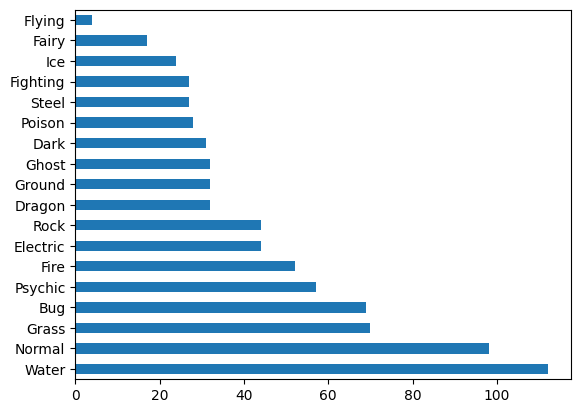

In [2]:
dataframe = pd.read_csv("../datasets/Pokemon.csv")
print(dataframe.head())
print(dataframe.describe())
print(dataframe["Type 1"].value_counts())
dataframe["Type 1"].value_counts().plot(kind="barh")
plt.show()

## How DataFrame is Indexed

In [3]:
# Every DataFrame at least has one row index and
# one column index
dataframe.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [4]:
dataframe.index

RangeIndex(start=0, stop=800, step=1)

## Accessing Column(s)

In [5]:
# Accessing column(s)
# dot notation to access attribute of object
dataframe.Name

0                  Bulbasaur
1                    Ivysaur
2                   Venusaur
3      VenusaurMega Venusaur
4                 Charmander
               ...          
795                  Diancie
796      DiancieMega Diancie
797      HoopaHoopa Confined
798       HoopaHoopa Unbound
799                Volcanion
Name: Name, Length: 800, dtype: object

In [6]:
# similar operation but using indexing operator - square bracket
dataframe["Name"]

0                  Bulbasaur
1                    Ivysaur
2                   Venusaur
3      VenusaurMega Venusaur
4                 Charmander
               ...          
795                  Diancie
796      DiancieMega Diancie
797      HoopaHoopa Confined
798       HoopaHoopa Unbound
799                Volcanion
Name: Name, Length: 800, dtype: object

In [7]:
# select multiple columns
dataframe[["Name", "HP", "Attack", "Defense"]]

,Name,HP,Attack,Defense
0,Bulbasaur,45,49,49
1,Ivysaur,60,62,63
2,Venusaur,80,82,83
3,VenusaurMega Venusaur,80,100,123
4,Charmander,39,52,43
...,...,...,...,...
795,Diancie,50,100,150
796,DiancieMega Diancie,50,160,110
797,HoopaHoopa Confined,80,110,60
798,HoopaHoopa Unbound,80,160,60


In [8]:
# drilling down
dataframe["Name"][0]

'Bulbasaur'

## Indexing

In [9]:
# index-based selection - based on index position
# select first row
dataframe.iloc[1, :]

#                   2
Name          Ivysaur
Type 1          Grass
Type 2         Poison
Total             405
HP                 60
Attack             62
Defense            63
Sp. Atk            80
Sp. Def            80
Speed              60
Generation          1
Legendary       False
Name: 1, dtype: object

In [10]:
# select last column
dataframe.iloc[:, -1]

0      False
1      False
2      False
3      False
4      False
       ...  
795     True
796     True
797     True
798     True
799     True
Name: Legendary, Length: 800, dtype: bool

In [11]:
# label-based selection - based on index value
# select Name column
dataframe.loc[:, "Name"]

0                  Bulbasaur
1                    Ivysaur
2                   Venusaur
3      VenusaurMega Venusaur
4                 Charmander
               ...          
795                  Diancie
796      DiancieMega Diancie
797      HoopaHoopa Confined
798       HoopaHoopa Unbound
799                Volcanion
Name: Name, Length: 800, dtype: object

In [12]:
# select second row
dataframe.loc[1, :]

#                   2
Name          Ivysaur
Type 1          Grass
Type 2         Poison
Total             405
HP                 60
Attack             62
Defense            63
Sp. Atk            80
Sp. Def            80
Speed              60
Generation          1
Legendary       False
Name: 1, dtype: object

In [13]:
# select multiple columns
dataframe.loc[:, ["Name", "HP", "Attack", "Defense"]]

,Name,HP,Attack,Defense
0,Bulbasaur,45,49,49
1,Ivysaur,60,62,63
2,Venusaur,80,82,83
3,VenusaurMega Venusaur,80,100,123
4,Charmander,39,52,43
...,...,...,...,...
795,Diancie,50,100,150
796,DiancieMega Diancie,50,160,110
797,HoopaHoopa Confined,80,110,60
798,HoopaHoopa Unbound,80,160,60


In [14]:
# region Index can be changes, like everything else in life
df_with_name_index = dataframe.set_index("Name", drop=True)
df_with_name_index.loc["Charizard"]

#                  6
Type 1          Fire
Type 2        Flying
Total            534
HP                78
Attack            84
Defense           78
Sp. Atk          109
Sp. Def           85
Speed            100
Generation         1
Legendary      False
Name: Charizard, dtype: object

## Conditional Selection

In [15]:
# Conditional selection that fulfills certain criteria
# setting a condition to return a Boolean Series
min_HP_condition = dataframe.HP > 200

In [16]:
# this line will not work, do you know why?
# dataframe.iloc[min_HP_condition]

In [17]:
# conditional selection of rows that satisfies the condition
dataframe.loc[min_HP_condition]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
121,113,Chansey,Normal,NaN,450,250,5,5,35,105,50,1,False
261,242,Blissey,Normal,NaN,540,255,10,10,75,135,55,2,False


In [18]:
# conditional selection on multiple criteria
min_attack_condition = dataframe.Attack > 100
min_defense_condition = dataframe.Defense > 100
dataframe.loc[min_attack_condition & min_defense_condition]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
12,9,BlastoiseMega Blastoise,Water,NaN,630,79,103,120,135,115,78,1,False
82,76,Golem,Rock,Ground,495,80,120,130,55,65,45,1,False
107,99,Kingler,Water,NaN,475,55,130,115,50,50,75,1,False
120,112,Rhydon,Ground,Rock,485,105,130,120,45,45,40,1,False
137,127,PinsirMega Pinsir,Bug,Flying,600,65,155,120,65,90,105,1,False
141,130,GyaradosMega Gyarados,Water,Dark,640,95,155,109,70,130,81,1,False
152,141,Kabutops,Rock,Water,495,60,115,105,65,70,80,1,False
224,208,SteelixMega Steelix,Steel,Ground,610,75,125,230,55,95,30,2,False
229,212,ScizorMega Scizor,Bug,Steel,600,70,150,140,65,100,75,2,False


In [19]:
dataframe.loc[min_attack_condition | min_defense_condition]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
12,9,BlastoiseMega Blastoise,Water,NaN,630,79,103,120,135,115,78,1,False
19,15,BeedrillMega Beedrill,Bug,Poison,495,65,150,40,15,80,145,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


## Changing Value(s)

In [20]:
# Changing a value
# able to access specific value in the DataFrame means that
# you can also change the value
dataframe.loc[0, "Name"] = "Rilakuma"

In [21]:
# Changing multiple values at once
# mapping from one value to another for a Series
dataframe.HP.map(lambda x: 0)

0      0
1      0
2      0
3      0
4      0
      ..
795    0
796    0
797    0
798    0
799    0
Name: HP, Length: 800, dtype: int64

In [22]:
# applying a transformation on a DataFrame
# transform each column by passing "columns" or 1 argument to axis parameter
dataframe.apply(lambda x: x * 2, axis="columns")

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,2,RilakumaRilakuma,GrassGrass,PoisonPoison,636,90,98,98,130,130,90,2,0
1,4,IvysaurIvysaur,GrassGrass,PoisonPoison,810,120,124,126,160,160,120,2,0
2,6,VenusaurVenusaur,GrassGrass,PoisonPoison,1050,160,164,166,200,200,160,2,0
3,6,VenusaurMega VenusaurVenusaurMega Venusaur,GrassGrass,PoisonPoison,1250,160,200,246,244,240,160,2,0
4,8,CharmanderCharmander,FireFire,NaN,618,78,104,86,120,100,130,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,1438,DiancieDiancie,RockRock,FairyFairy,1200,100,200,300,200,300,100,12,2
796,1438,DiancieMega DiancieDiancieMega Diancie,RockRock,FairyFairy,1400,100,320,220,320,220,220,12,2
797,1440,HoopaHoopa ConfinedHoopaHoopa Confined,PsychicPsychic,GhostGhost,1200,160,220,120,300,260,140,12,2
798,1440,HoopaHoopa UnboundHoopaHoopa Unbound,PsychicPsychic,DarkDark,1360,160,320,120,340,260,160,12,2


**Copyright (C) 2021  Lee Kian Yang**

This program is free software: you can redistribute it and/or modify
it under the terms of the GNU General Public License as published by
the Free Software Foundation, either version 3 of the License, or
(at your option) any later version.

This program is distributed in the hope that it will be useful,
but WITHOUT ANY WARRANTY; without even the implied warranty of
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
GNU General Public License for more details.

You should have received a copy of the GNU General Public License
along with this program.  If not, see <http://www.gnu.org/licenses/>.